<a id="ID_top"></a>
## Adjacency matrix and network chart

This workflow takes live files and calls on functions in `script_adj_matrix_plot.py` to create adjancency matrices and network graph

#### Notebook sections:
    
|| [0|Top](#ID_top) || [1|Part1](#ID_part1) || [2|Part2](#ID_part2) || [3|Part3](#ID_part3) || [4|Part4](#ID_part4) || [5|Part5](#ID_part5) ||

### Packages

In [ ]:
%load s_package_import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# package to get all file names in directory
import os
from shutil import copyfile
from shutil import make_archive
import zipfile
# create dataframes
import pandas as pd
# dynamic versioning
from datetime import datetime

In [4]:
import script_adj_matrix_plot as mp
mp.f_file_test()

Funciton package loaded


<a id="ID_part1"></a>
### Part 1 | File paths
|| [0|Top](#ID_top) || [1|Part1](#ID_part1) || [2|Part2](#ID_part2) || [3|Part3](#ID_part3) || [4|Part4](#ID_part4) || [5|Part5](#ID_part5) ||

In [ ]:
# %load script_filepaths.py
# This script allows one to load and correct raw files before saving them again.
file_path_0_raw       = "./0_raw/"
file_path_1_backup    = "./1_raw_processed_backup/"
file_path_2_input     = "./2_raw_processed_input/"
file_path_3_generated = "./3_generated_inputs/"

<a id="ID_part2"></a>
### Part 2 | Load files
|| [0|Top](#ID_top) || [1|Part1](#ID_part1) || [2|Part2](#ID_part2) || [3|Part3](#ID_part3) || [4|Part4](#ID_part4) || [5|Part5](#ID_part5) ||

In [5]:
# list of all files
filenames = os.listdir(file_path_2_input)
print(filenames)

# list of file names that can be read with same rule
file_to_batch_read = [filenames[1]]

['2_raw_explainer_doc.md', 'input_dynamic_gravity.csv.gzip']


Load data directly from compressed file to avoid GitHub issues with storage

In [6]:
# Load data
df_05_16 = pd.read_csv(f"{file_path_2_input}{file_to_batch_read[0]}",compression= "gzip")

#### Filter on certain countries

Filter for all of asia:
```
trial_df = trial_df[
    ((trial_df.region_d.str.contains("asia")) | (trial_df.region_d.str.contains("east")))
    & 
    ((trial_df.region_o.str.contains("asia")) | (trial_df.region_o.str.contains("east")))
```

Filter for all countries that have a connection (avoid showing little islands or unconnected regions
```
trial_df = trial_df[(trial_df.contiguity == 1)]
```

In [14]:
# Filters
europe_filter = (trial_df.region_d == "europe") & (trial_df.region_o == "europe")
europe_land_filter = (trial_df.region_d == "europe") & (trial_df.region_o == "europe") & (trial_df.contiguity == 1)
asia_all = ((trial_df.region_d.str.contains("asia")) | (trial_df.region_d.str.contains("east"))) & ((trial_df.region_o.str.contains("asia")) | (trial_df.region_o.str.contains("east")))
land_all = (trial_df.contiguity == 1)

#trial_df = trial_df[(trial_df.region_d == "europe") & (trial_df.region_o == "europe") & (trial_df.contiguity == 1)]

In [19]:
# Preview data
trial_df = df_05_16[df_05_16.year == 2016]
trial_df = trial_df[(trial_df.region_d == "europe") & (trial_df.region_o == "europe") & (trial_df.contiguity == 1)]

trial_df.head()

,Unnamed: 0,year,country_d,iso3_d,dynamic_code_d,landlocked_d,island_d,region_d,gdp_pwt_const_d,pop_d,...,hostility_level_o,hostility_level_d,distance,common_language,colony_of_destination_after45,colony_of_destination_current,colony_of_destination_ever,colony_of_origin_after45,colony_of_origin_current,colony_of_origin_ever
20702,20702,2016,Albania,ALB,ALB,0,0,europe,NaN,NaN,...,0,0,448.35135,1,0,0,0,0,0,0
20710,20710,2016,Albania,ALB,ALB,0,0,europe,NaN,NaN,...,0,0,151.12527,1,0,0,0,0,0,0
20801,20801,2016,Albania,ALB,ALB,0,0,europe,NaN,NaN,...,0,0,179.83369,1,0,0,0,0,0,0
20819,20819,2016,Albania,ALB,ALB,0,0,europe,NaN,NaN,...,0,0,158.34096,1,0,0,0,0,0,0
23685,23685,2016,Andorra,AND,AND,1,0,europe,NaN,NaN,...,0,0,810.27991,1,0,0,0,0,0,0


<a id="ID_part3"></a>
### Part 3 | Produce matrix and network
|| [0|Top](#ID_top) || [1|Part1](#ID_part1) || [2|Part2](#ID_part2) || [3|Part3](#ID_part3) || [4|Part4](#ID_part4) || [5|Part5](#ID_part5) ||

Start-up report | Two different equal count (46) columns are used.
nodes: 46
edges: 82


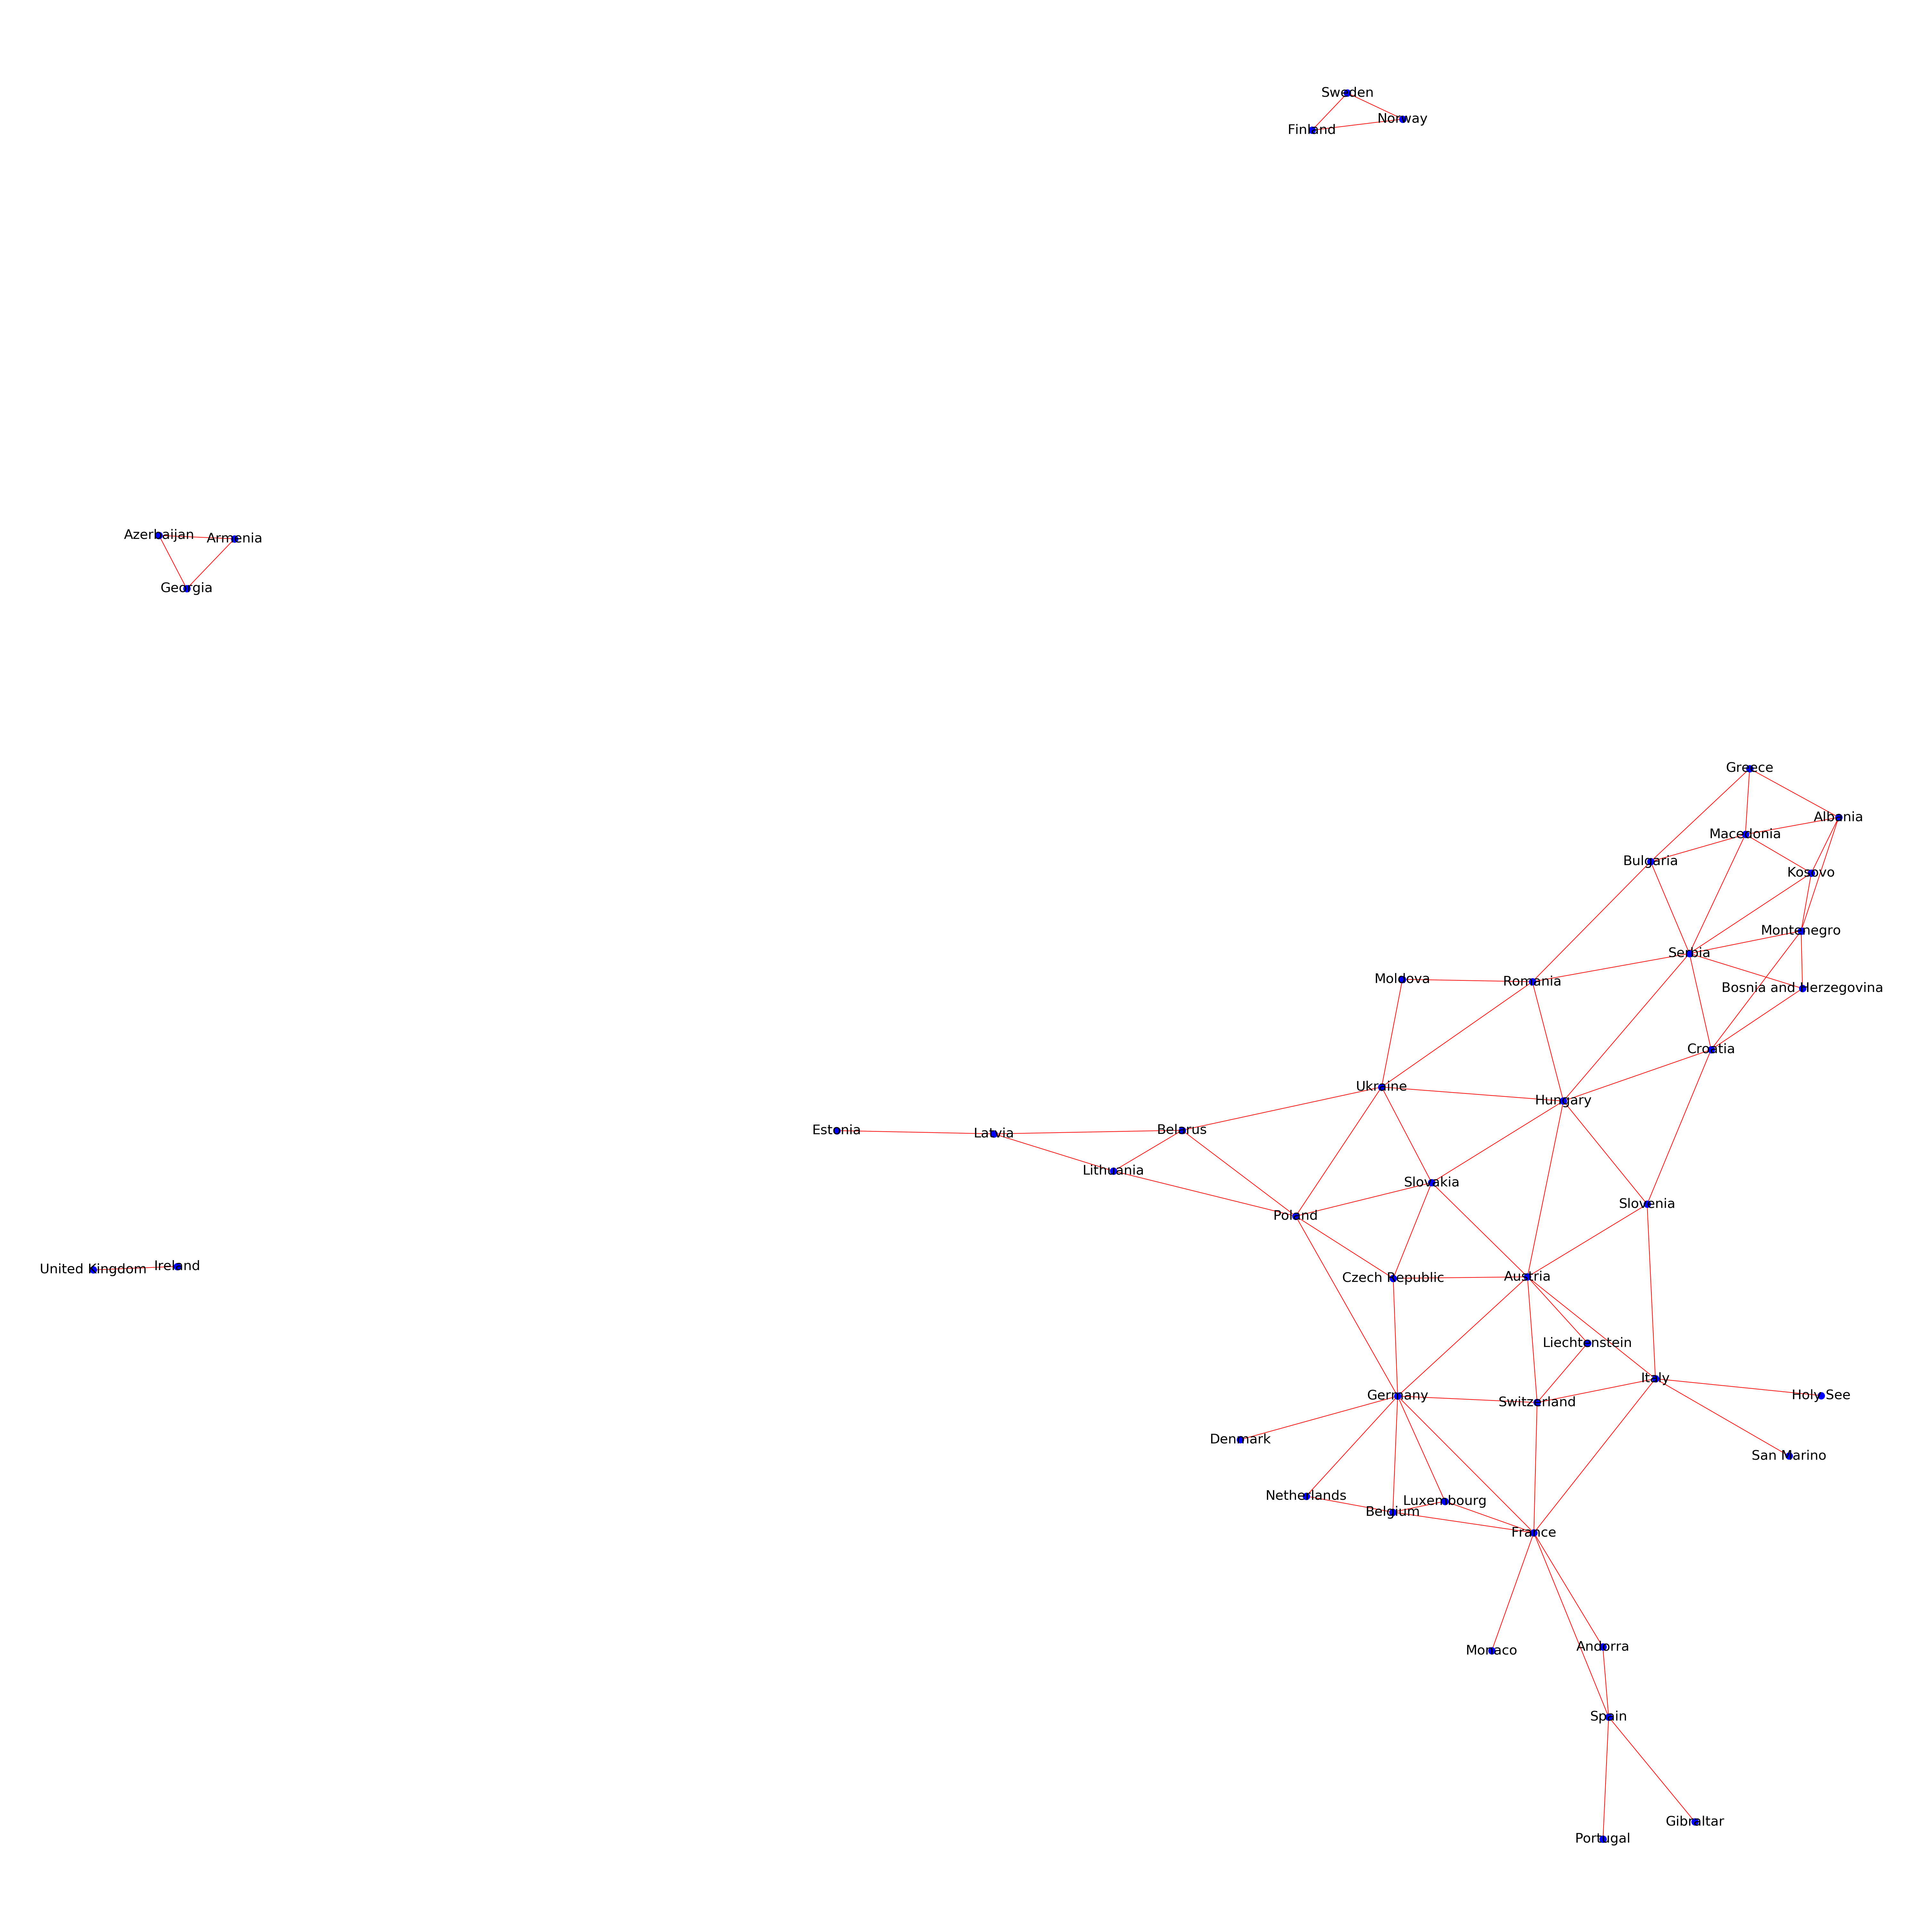

In [20]:
#temp_df test df working
test_f_run = mp.f_adj_matrix(trial_df,"iso3_o","iso3_d",p_col_full = "country_o",p_index_full = "country_d")
mp.f_graph(test_f_run[1])